In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sklearn as sk
import pydotplus
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score

In [132]:
df=pd.read_csv("16325569497737558.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Exploring data**

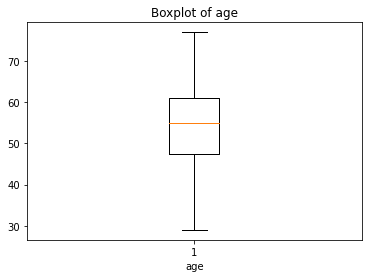

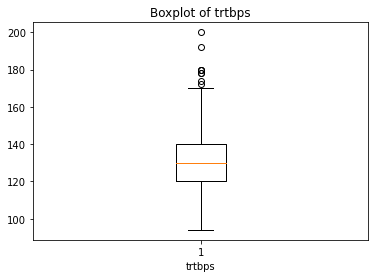

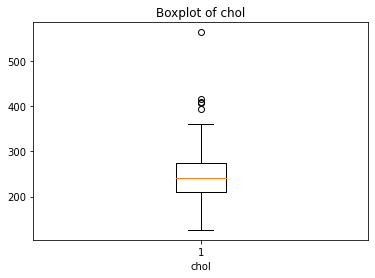

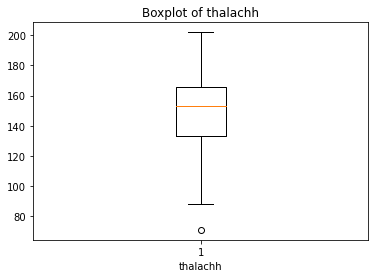

In [133]:
selected_columns = ['age', 'trtbps', 'chol', 'thalachh'] 

for column in selected_columns:
    plt.figure(figsize=(6, 4))  # Optional: Set the figure size
    plt.boxplot(df[column], vert=True)  # Create a horizontal boxplot
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

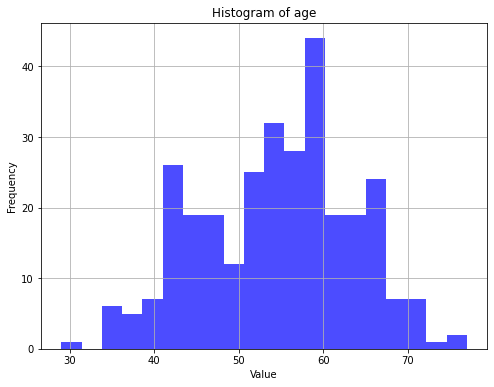

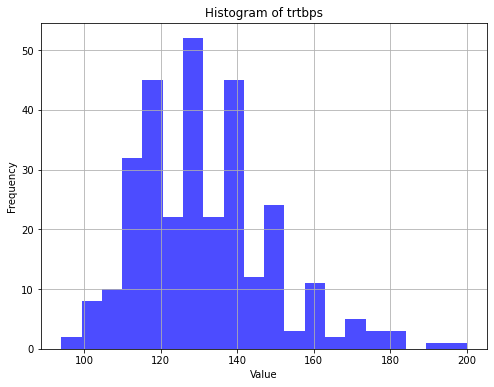

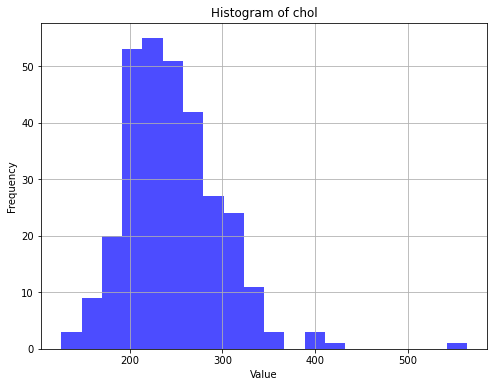

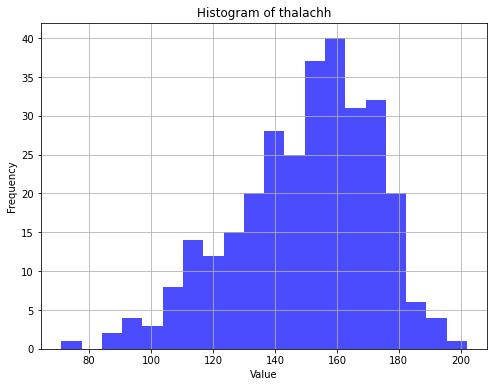

In [134]:
selected_columns = ['age', 'trtbps', 'chol', 'thalachh'] 

for column in selected_columns:
    plt.figure(figsize=(8, 6)) 
    plt.hist(df[column], bins=20, color='blue', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    
    plt.show()

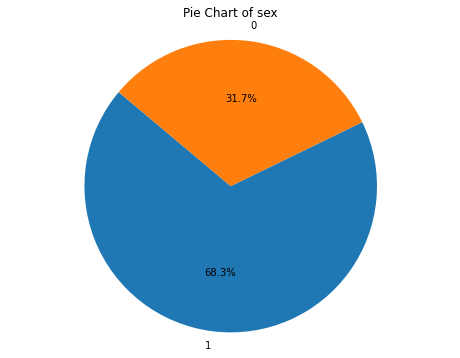

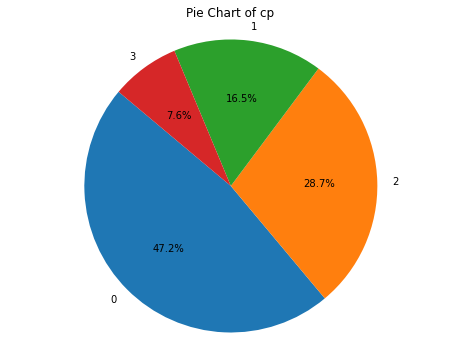

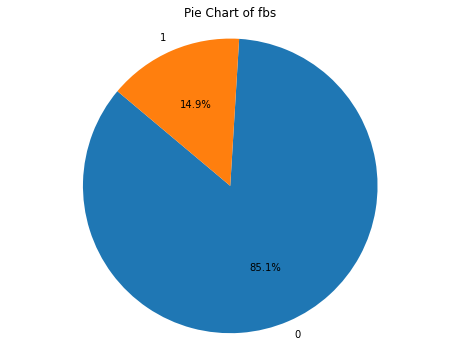

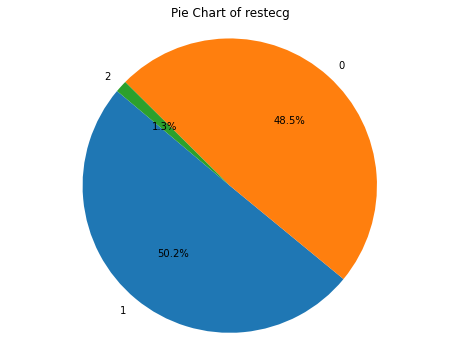

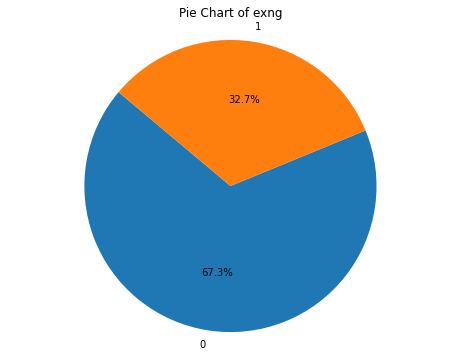

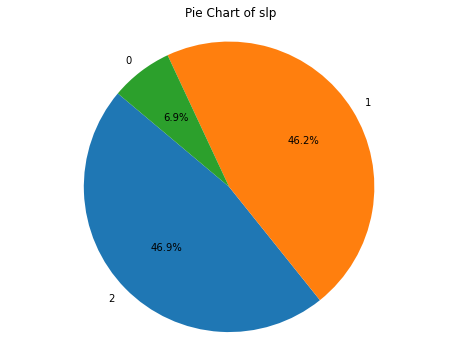

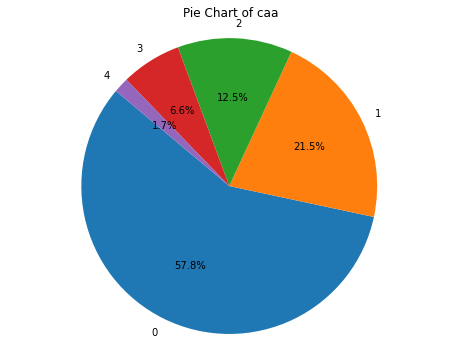

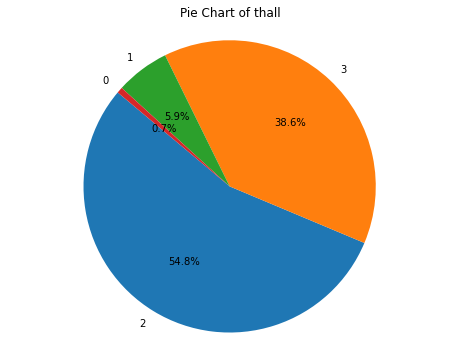

In [135]:
selected_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    value_counts = df[column].value_counts()
    
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  
    plt.title(f'Pie Chart of {column}')
    
    # Show the pie chart
    plt.show()


**Splitting and normalizing Data**

In [136]:
x = df.drop('output', axis =1)
y = df['output']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# **Decision Tree Classifier

In [137]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(x_train_scaled, y_train)
predTree = drugTree.predict(x_test)
print (predTree [0:5])
print (y_test [0:5])

[0 1 0 1 1]
245    0
162    1
10     1
161    1
73     1
Name: output, dtype: int64


C:\Users\hajis\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [138]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8131868131868132


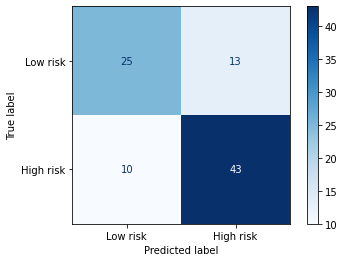

In [139]:
predictions = drugTree.predict(x_test_scaled)
matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Low risk', 'High risk'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

# **K Nearest Neighbor

In [140]:
#finding best k
accuracies = []
k_list = list(range(1,20))

for k in range(1,20):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(x_train_scaled, y_train)
    accuracies.append(KNNmodel.score(x_test_scaled, y_test))
    

l_np = np.asarray(accuracies)

print(f"Best K for best accuracy is: {l_np.argmax()+1}")

Best K for best accuracy is: 5


In [141]:
#training the model
k=5
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_scaled,y_train)
neigh

KNeighborsClassifier()

In [142]:
yhat = neigh.predict(x_test)
yhat[0:5]

C:\Users\hajis\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1], dtype=int64)

In [143]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train_scaled)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8726415094339622
Test set Accuracy:  0.5824175824175825


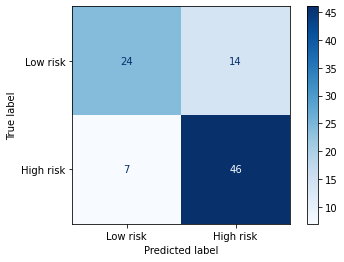

In [144]:
predictions = KNNmodel.predict(x_test_scaled)
matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Low risk', 'High risk'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

# **Logistic Regression


In [145]:
Reg_model = LogisticRegression()
Reg_model.fit(x_train_scaled, y_train)

yhat = Reg_model.predict(x_test_scaled)

yhat_prob = Reg_model.predict_proba(x_test_scaled)



In [146]:
from sklearn.metrics import jaccard_score
a= jaccard_score(y_test, yhat,pos_label=0)
print('The Jaccard score for our model is:')
print(a)

The Jaccard score for our model is:
0.65


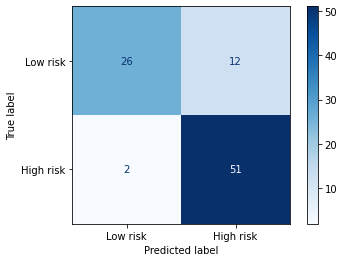

In [147]:
predictions = Reg_model.predict(x_test_scaled)
matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Low risk', 'High risk'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

# Support Vector Machine
Support vector machine has diffrent types of kernels. First, a loop code for choosing the best kernel is written and then the best is chosen to fit the data.

In [148]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

best_kernel = None
best_accuracy = 0.0

for kernel in kernels:
    clf = SVC(kernel=kernel)
    scores = cross_val_score(clf, x_train_scaled, y_train, cv=5)  
    
    accuracy = np.mean(scores)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

best_model = SVC(kernel=best_kernel)
best_model.fit(x_train_scaled, y_train)

test_accuracy = best_model.score(x_test_scaled, y_test)

print(f"Best Kernel: {best_kernel}")
print(f"Test Accuracy with Best Kernel: {test_accuracy:.2f}")


Best Kernel: linear
Test Accuracy with Best Kernel: 0.86


In [149]:
clf = SVC(kernel = 'linear')
clf.fit(x_train_scaled, y_train)

SVC(kernel='linear')

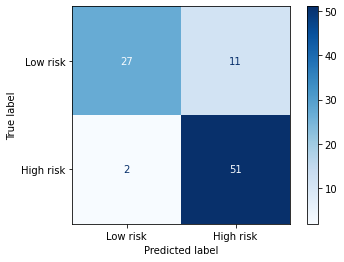

In [150]:
predictions = clf.predict(x_test_scaled)
matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Low risk', 'High risk'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()